# Introduction

In this notebook, we will explore and analyze a dataset related to Detik, one of the largest news platforms in Indonesia. The dataset contains information on user interactions with various news articles published on the Detik website. By analyzing this data, we aim to uncover insights into how readers engage with the content, what types of articles generate the most interest, and which factors contribute to higher or lower levels of engagement. This analysis is conducted using Jupyter Notebook on 11 August by Muhammad Zulfikar, as the assignment for MSIB Batch 7 at Detik as a Data Analyst.

# Data Loading, Cleaning, and Initial Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
# URL of the Google Sheets CSV
url = "https://docs.google.com/spreadsheets/d/1xjDebq9w7BjmAlH87EFbuxgWk2YpK2MguNiyr2rWngY/pub?output=csv"

# Read the CSV file from the URL
df = pd.read_csv(url)

In [2]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Source/Medium           156 non-null    object 
 1   Page Title              156 non-null    object 
 2   Users                   155 non-null    float64
 3   Bounce Rate             155 non-null    float64
 4   Page Views              155 non-null    float64
 5   Page Views Per Session  155 non-null    float64
 6   Average Time On Page    155 non-null    float64
dtypes: float64(5), object(2)
memory usage: 8.7+ KB


In [3]:
# Show the first few rows of the data
df.head()

,Source/Medium,Page Title,Users,Bounce Rate,Page Views,Page Views Per Session,Average Time On Page
0,facebook / cpc,"Bikin Lambe Turah Diomelin, Nih Si Seksi yang ...",13736.0,19.269967,83593.0,6.042140,21.790189
1,facebook / cpc,Heboh! Kiki Farel Transfer Uang Jajan Rp 1 Jut...,15909.0,62.303763,74032.0,4.612011,16.330553
2,facebook / cpc,"Tak Sesuai Harapan, Barang Belanja Online Ini ...",7748.0,30.934520,54657.0,6.949396,21.429338
3,facebook / cpc,"Antar 'Tuyul', 7 Pengemudi Grab Dibekuk",43893.0,6.966219,47924.0,1.106560,5.056397
4,facebook / cpc,Melihat Kantor Pelayanan Grab Driver Center,41155.0,11.630219,44072.0,43.809145,180.944233


In [4]:
# Display summary statistics
df.describe()

,Users,Bounce Rate,Page Views,Page Views Per Session,Average Time On Page
count,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1995.722581,31.925982,3607.174194,16.204284,75.428357
std,6449.314679,36.030184,11845.050364,32.522916,77.975259
min,9.000000,0.000000,215.000000,0.000000,2.814915
25%,108.000000,0.000000,287.000000,0.000000,16.948403
50%,233.000000,17.070773,431.000000,2.353535,44.720930
75%,458.000000,62.401881,826.000000,22.194444,109.392803
max,43893.000000,100.000000,83593.000000,268.833333,449.897196


In [5]:
# Check for missing values
df.isnull().sum()

Source/Medium             0
Page Title                0
Users                     1
Bounce Rate               1
Page Views                1
Page Views Per Session    1
Average Time On Page      1
dtype: int64

In [6]:
# Remove rows with missing values
df = df.dropna()

## Data Overview and Summary Statistics:

The dataset contains information about web page traffic, with 156 entries and 7 columns. After removing one row with missing values, we're left with 155 entries. The data includes:

- Source/Medium: Traffic source
- Page Title: Title of the web page
- Users: Number of visitors
- Bounce Rate: Percentage of single-page sessions
- Page Views: Total page views
- Page Views Per Session: Average pageviews per session
- Average Time On Page: Average time spent on the page (in seconds)

## Key statistics:

- Average users per page: ~1,996
- Average bounce rate: ~31.93%
- Average page views: ~3,607
- Average page views per session: ~16.20
- Average time on page: ~75.43 seconds

# Exploratory Data Analysis (EDA) & Data Visualizations

## User Distributions

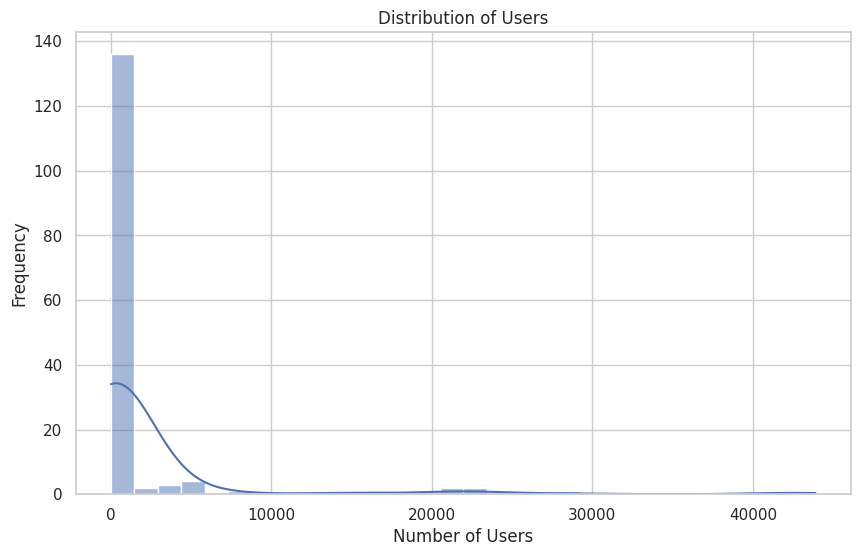

In [7]:
# Set the style for the plots
sns.set(style='whitegrid')

# Plot the distribution of users
plt.figure(figsize=(10, 6))
sns.histplot(df['Users'].dropna(), bins=30, kde=True)
plt.title('Distribution of Users')
plt.xlabel('Number of Users')
plt.ylabel('Frequency')
plt.show()

The histogram shows the distribution of users across the web pages. The plot reveals:

A highly right-skewed distribution
Most pages have relatively low user counts (under 5,000)
A few pages have extremely high user counts (over 40,000)

This distribution suggests that a small number of "viral" or highly popular pages are driving a significant portion of the overall traffic.

## Pageviews vs. Users

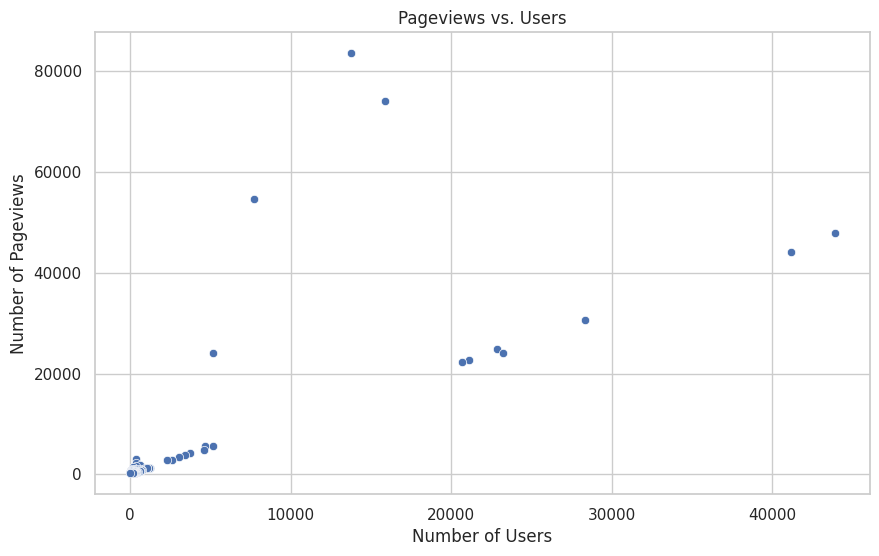

In [8]:
# Plot the relationship between pageviews and users
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Users', y='Page Views', data=df)
plt.title('Pageviews vs. Users')
plt.xlabel('Number of Users')
plt.ylabel('Number of Pageviews')
plt.show()

- A strong positive correlation between users and pageviews
- Most data points clustered in the lower left corner (low users, low pageviews)
- A few outliers with very high users and pageviews

This relationship is expected: more users generally lead to more pageviews. However, the outliers are particularly interesting. These represent highly successful pages that not only attract many users but also generate many views, possibly indicating engaging content that users are sharing or returning to multiple times.

## Bounce Rate Distribution

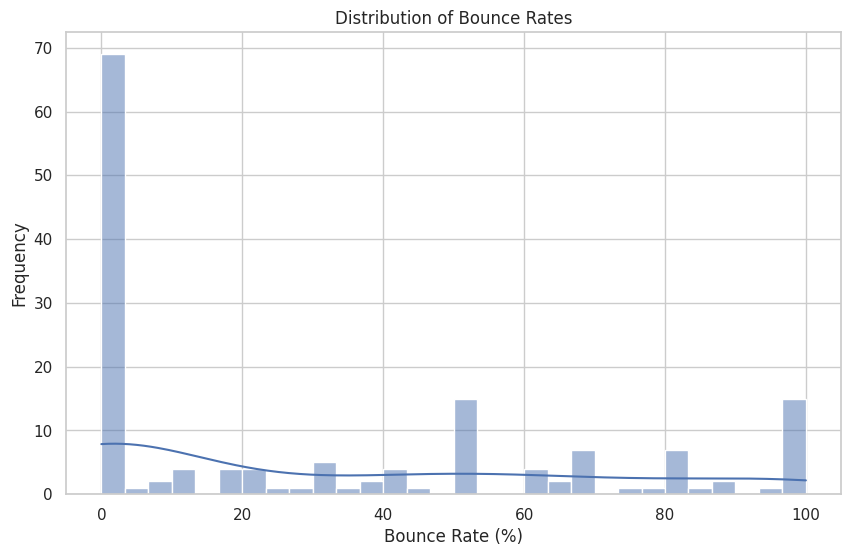

In [9]:
# Plot the distribution of bounce rates
plt.figure(figsize=(10, 6))
sns.histplot(df['Bounce Rate'].dropna(), bins=30, kde=True)
plt.title('Distribution of Bounce Rates')
plt.xlabel('Bounce Rate (%)')
plt.ylabel('Frequency')
plt.show()

- A bimodal distribution
- One peak near 0% bounce rate
- Another peak around 60-70% bounce rate

This unusual distribution suggests two distinct types of content:

- Highly engaging content that keeps users on the site (low bounce rate)
- Content that users tend to view briefly before leaving (high bounce rate)

## Pageviews Per Session vs. Average Time on Page

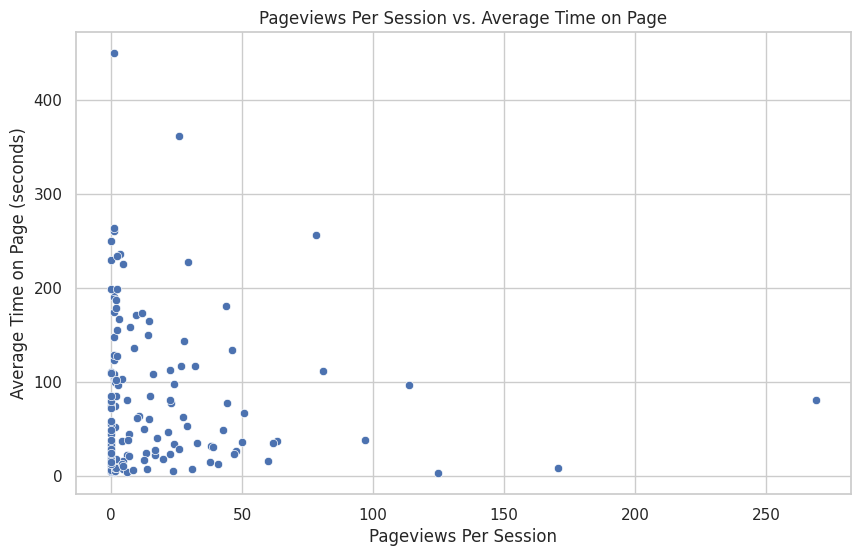

In [10]:
# Plot the relationship between pageviews per session and average time on page
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Page Views Per Session', y='Average Time On Page', data=df)
plt.title('Pageviews Per Session vs. Average Time on Page')
plt.xlabel('Pageviews Per Session')
plt.ylabel('Average Time on Page (seconds)')
plt.show()

- A positive correlation between pageviews per session and average time on page
- Most data points clustered in the lower left (low pageviews per session, low time on page)
- A few outliers with very high pageviews per session and/or time on page

The correlation makes sense: users who view more pages typically spend more time on the site. The outliers represent exceptionally engaging content that keeps users on the page for a long time or encourages them to view many pages. These could be long-form articles, interactive features, or particularly compelling topics.

# Engagement Analysis

## Calculating Engagement Scores

In [11]:
# Identify articles with the highest and lowest engagement based on bounce rate, pageviews per session, and average time on page

# Calculate engagement score as a combination of low bounce rate, high pageviews per session, and high average time on page
# Normalize the metrics for comparison
from sklearn.preprocessing import MinMaxScaler

# Select relevant columns and create a copy to avoid warnings
engagement_data = df[['Page Title', 'Bounce Rate', 'Page Views Per Session', 'Average Time On Page']].copy()

# Initialize the scaler
scaler = MinMaxScaler()

# Normalize the data and assign it back using .loc[]
engagement_data.loc[:, ['Bounce Rate', 'Page Views Per Session', 'Average Time On Page']] = scaler.fit_transform(
    engagement_data[['Bounce Rate', 'Page Views Per Session', 'Average Time On Page']]
)

# Calculate engagement score
engagement_data['engagement_score'] = (
    (1 - engagement_data['Bounce Rate']) +
    engagement_data['Page Views Per Session'] +
    engagement_data['Average Time On Page']
)

# Sort by engagement score
engagement_data_sorted = engagement_data.sort_values(by='engagement_score', ascending=False)

## Identifying Top and Bottom Articles by Engagement

In [12]:
# Display top 5 articles by engagement
print("Top 5 Articles by Engagement:")
engagement_data_sorted.head()

Top 5 Articles by Engagement:


,Page Title,Bounce Rate,Page Views Per Session,Average Time On Page,engagement_score
13,Pasha 'Ungu' Digugat DPRD Palu karena Nyanyi d...,0.5,1.000000,0.173962,1.673962
23,Meme detikHOT: Dinda Syarif di Ganasnya Gerbon...,0.0,0.634429,0.012410,1.646838
34,"Diprotes TNI AD, Pihak RCTI Minta Maaf",0.0,0.422815,0.210291,1.633105
67,"Gempa 6,4 SR Guncang Ibu Kota",0.0,0.000000,0.551899,1.551899
86,Andi Narogong Ungkap Peran Novanto cs di Proye...,0.0,0.000000,0.507858,1.507858


The analysis calculates an engagement score based on bounce rate, pageviews per session, and average time on page.

## Top 5 engaging articles:

- "Pasha 'Ungu' Digugat DPRD Palu karena Nyanyi di Singapura"
- "Meme detikHOT: Dinda Syarif di Ganasnya Gerbong KRL Wanita"
- "Diprotes TNI AD, Pihak RCTI Minta Maaf"
- "Gempa 6,4 SR Guncang Ibu Kota"
- "Andi Narogong Ungkap Peran Novanto cs di Proyek e-KTP"

These articles seem to be a mix of entertainment news, controversy, and breaking news about natural disasters and politics.

In [13]:
# Display bottom 5 articles by engagement
print("Bottom 5 Articles by Engagement:")
engagement_data_sorted.tail()

Bottom 5 Articles by Engagement:


,Page Title,Bounce Rate,Page Views Per Session,Average Time On Page,engagement_score
79,"Potret Kepanikan Warga Jakarta saat Gempa 6,4 SR",1.0,0.174416,0.046703,0.221119
87,Komentar : 2 Pelajar di Yogya Lempar Batu ke M...,1.0,0.081628,0.098564,0.180192
113,"Istri Jual Suami Demi Layanan Fantasi, Polisi:...",1.0,0.039540,0.136742,0.176282
91,Meme Kocak Sambut Rumah DP Rp 0 Langsung Ramai...,1.0,0.152098,0.022506,0.174604
96,Foto: Gus Ipul Diapit Via Vallen-Nella Kharisma,1.0,0.140938,0.026608,0.167546


## Bottom 5 engaging articles:

- "Foto: Gus Ipul Diapit Via Vallen-Nella Kharisma"
- "Meme Kocak Sambut Rumah DP Rp 0 Langsung Ramai Bertebaran"
- "Istri Jual Suami Demi Layanan Fantasi, Polisi: Motifnya Ekonomi"
- "Komentar : 2 Pelajar di Yogya Lempar Batu ke Mobil hingga Tewaskan Pengemudinya"
- "Potret Kepanikan Warga Jakarta saat Gempa 6,4 SR"

These less engaging articles appear to be a mix of light entertainment, memes, and follow-up stories to breaking news.

# Summary of Findings and Insights:

- Content Performance Variability: There's a wide range in content performance, with some pages attracting thousands of users and others only a few dozen.
- Viral Content: A small number of pages drive a large portion of traffic, suggesting the potential impact of "viral" content.
- User Engagement Patterns: There are two distinct patterns of user engagement – pages with very low bounce rates and pages with high bounce rates. This could indicate different types of content or different user intentions.
- Breaking News Impact: Breaking news items, especially about natural disasters or political controversies, tend to have high engagement.
- Entertainment Value: Entertainment news, particularly about celebrities or controversial events, often ranks high in engagement.
- Content Length and Depth: Pages with high pageviews per session and long average time on page suggest that in-depth or long-form content can be highly engaging when done well.
- Meme and Light Content Performance: While some meme-related content performs well, others are among the least engaging, indicating that the success of such content can be hit-or-miss.